# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 9.4285105355639729, performing 55.2 it/sec
Step 100: Loss = 0.9682541564432374, performing 220.5 it/sec
Step 200: Loss = 0.5347881901851879, performing 189.0 it/sec
Step 300: Loss = 0.3823882625145050, performing 227.3 it/sec
Step 400: Loss = 0.2298944493876895, performing 168.9 it/sec
Step 500: Loss = 0.1281817486728353, performing 144.0 it/sec
No improvement since Step 498, early stopping.
[Best]  Step 497: Loss = 0.1234312561038697
[Final] Step 547: Loss = 0.1543140198600547

predicted end states
------------------------------------
         5th       Mean      95th
LF1C-1  1.65e-01  1.65e-01  1.65e-01
LF1C-2  2.06e-09  2.09e-09  2.13e-09
LF1C-3  8.47e-02  8.47e-02  8.47e-02
LF1C-4  2.48e-11  3.65e-11  5.11e-11
LF1C-5  1.38e-10  1.51e-10  1.66e-10
LF1C-6  1.07e-06  1.07e-06  1.07e-06
LF1C-7  2.22e-09  2.22e-09  2.22e-09
LF1C-8  

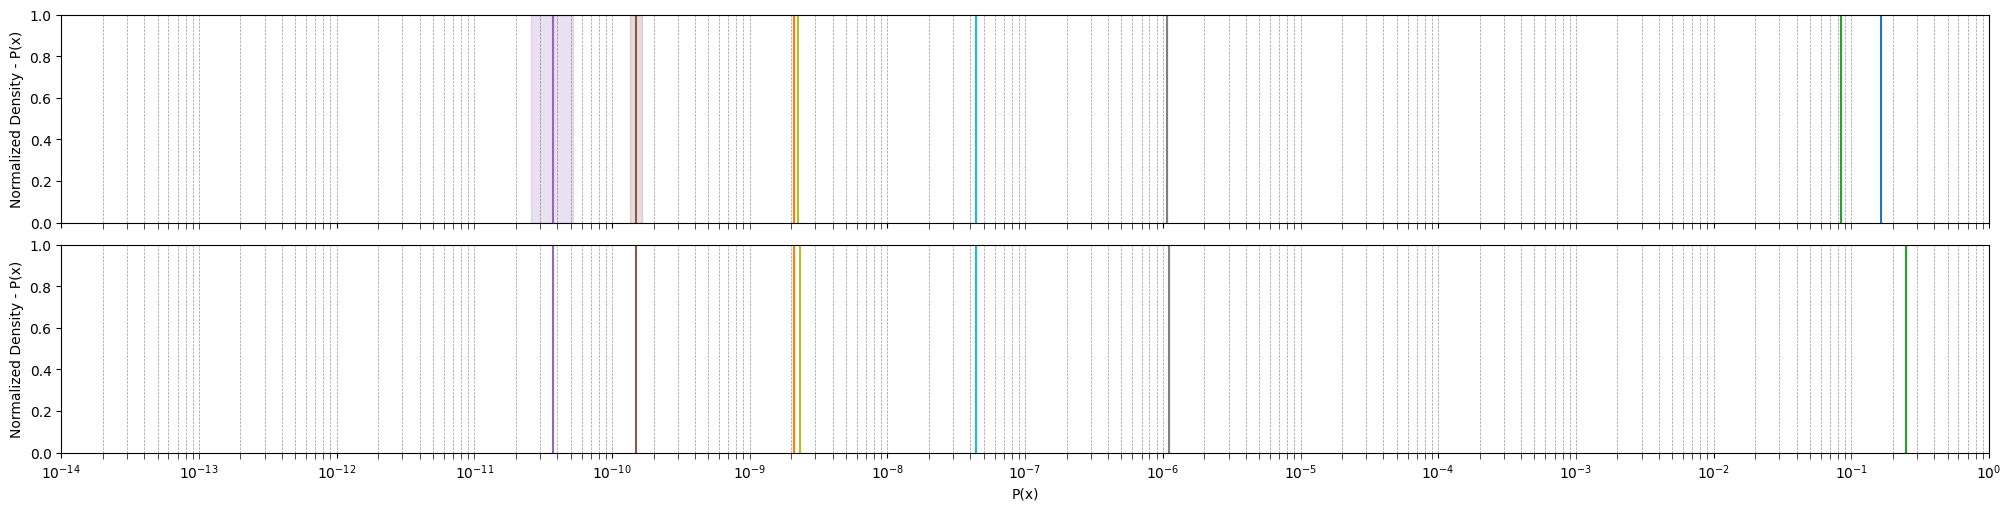

In [3]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 2.5e-1,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['LF1C', 'FSIG', 'FROD', 'PRUN|FROD', 'BPHR', 'DHRS|BPHR', 'DHRL|~BPHR', 'DHRL|~DHRS|BPHR'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    # 'LF1C-0': {
    #     'sequence': [0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    #     'probability': 1 - 2.5e-1 - 2.1e-9 - 2.5e-1 - 3.7e-11 - 1.5e-10 - 1.1e-6 - 2.3e-9 - 4.4e-8
    # },
    'LF1C-1': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, 0, np.nan],
        'probability': 2.5e-1,
    },
    'LF1C-2': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, 1, np.nan],
        'probability': 2.1e-9,
    },
    'LF1C-3': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, 0],
        'probability': 2.5e-1,
    },
    'LF1C-4': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, 1],
        'probability': 3.7e-11,
    },
    'LF1C-5': {
        'sequence': [1, 0, 0, np.nan, 1, 1, np.nan, np.nan],
        'probability': 1.5e-10,
    },
    'LF1C-6': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.1e-6,
    },
    'LF1C-7': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 2.3e-9,
    },
    'LF1C-8': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability':4.4e-8,
    },


}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)